In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches=pd.read_csv("all_matches.csv")

In [4]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
1,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
2,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
3,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
4,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal


In [5]:
matches.shape

(1520, 27)

In [6]:
clubs=matches['Team'].unique()
clubs

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Nottingham Forest',
       'Sheffield United', 'Tottenham Hotspur', 'West Ham United',
       'Wolverhampton Wanderers', 'Leeds United', 'Leicester City',
       'Southampton'], dtype=object)

In [7]:
matches["Team"].value_counts()

Team
Arsenal                     76
Wolverhampton Wanderers     76
Tottenham Hotspur           76
Nottingham Forest           76
Newcastle United            76
Manchester United           76
Manchester City             76
Aston Villa                 76
Liverpool                   76
Fulham                      76
Everton                     76
Crystal Palace              76
Chelsea                     76
Brighton and Hove Albion    76
Brentford                   76
Bournemouth                 76
West Ham United             76
Leicester City              38
Leeds United                38
Luton Town                  38
Sheffield United            38
Burnley                     38
Southampton                 38
Name: count, dtype: int64

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1520 non-null   object 
 1   Time          1520 non-null   object 
 2   Comp          1520 non-null   object 
 3   Round         1520 non-null   object 
 4   Day           1520 non-null   object 
 5   Venue         1520 non-null   object 
 6   Result        1520 non-null   object 
 7   GF            1520 non-null   int64  
 8   GA            1520 non-null   int64  
 9   Opponent      1520 non-null   object 
 10  xG            1520 non-null   float64
 11  xGA           1520 non-null   float64
 12  Poss          1520 non-null   float64
 13  Attendance    1518 non-null   float64
 14  Captain       1520 non-null   object 
 15  Formation     1520 non-null   object 
 16  Referee       1520 non-null   object 
 17  Match Report  1520 non-null   object 
 18  Notes         0 non-null    

# Data Cleaning

In [9]:
matches=matches.drop(['Notes','Match Report'],axis=1)

In [10]:
matches["Date"]=pd.to_datetime(matches["Date"])

In [11]:
matches["venue"]=matches["Venue"].astype("category").cat.codes

In [12]:
matches["hour"] = matches["Time"].str.replace(":.+","",regex=True).astype("int")

In [13]:
matches["day"]=matches["Date"].dt.dayofweek

In [14]:
matches=matches.drop(['Comp','Venue','GF','GA','Attendance','Sh','SoT','Dist','FK','PK','PKatt','Poss'],axis=1)

In [15]:
def timing(matches):
    if matches["hour"] <14:
        return "Early"
    elif 14<=matches["hour"] <17:
        return "Middle"
    else:
        return "Late"

In [16]:
matches["Team"].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Nottingham Forest',
       'Sheffield United', 'Tottenham Hotspur', 'West Ham United',
       'Wolverhampton Wanderers', 'Leeds United', 'Leicester City',
       'Southampton'], dtype=object)

In [17]:
matches["Kickoff"]=matches.apply(timing,axis=1)

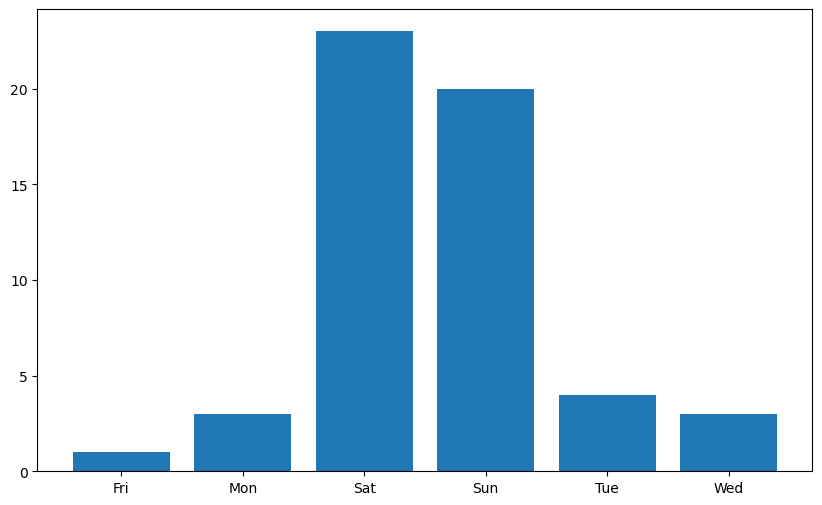

In [18]:
matches_ars=matches[matches["Team"]=="Arsenal"]
ars_win=matches_ars[matches_ars["Result"]=="W"]
ars_loss=matches_ars[matches_ars["Result"]=="L"]
plt.figure(figsize=(10,6))
day_counts=ars_win["Day"].value_counts().sort_index()
plt.bar(day_counts.index,day_counts.values)
plt.show()

In [19]:
matches=matches.drop(["Captain","Referee","Season","day","Date","Time","xGA","hour"],axis=1)

In [20]:
matches.head()

,Round,Day,Result,Opponent,xG,Formation,Team,venue,Kickoff
0,Matchweek 1,Sat,W,Nott'ham Forest,0.8,4-3-3,Arsenal,1,Early
1,Matchweek 2,Mon,W,Crystal Palace,2.0,4-3-3,Arsenal,0,Late
2,Matchweek 3,Sat,D,Fulham,3.2,4-3-3,Arsenal,1,Middle
3,Matchweek 4,Sun,W,Manchester Utd,2.3,4-3-3,Arsenal,1,Middle
4,Matchweek 5,Sun,W,Everton,1.0,4-3-3,Arsenal,0,Middle


### Alloting numbers to the team based on last seasons points table

In [21]:
ranking=matches[matches["Result"]=="W"]["Team"].value_counts()
teamsno = len(ranking)
ranking_df = pd.DataFrame(ranking)
ranking_df=ranking_df.reset_index()
ranking_df.columns = ['Team', 'Wins']

In [22]:
ranking_df["Rank"]=range(teamsno,0,-1)
ranking_df

,Team,Wins,Rank
0,Manchester City,56,23
1,Arsenal,54,22
2,Liverpool,43,21
3,Manchester United,41,20
4,Tottenham Hotspur,38,19
5,Aston Villa,38,18
6,Newcastle United,37,17
7,Brighton and Hove Albion,30,16
8,Chelsea,29,15
9,Fulham,28,14


In [23]:
# new_row_dict = {'Team': 'Nott\'ham Forest', 'Wins': 18 , 'Rank':17 
#                 ,'Team': 'Manchester Utd', 'Wins': 41 , 'Rank':4
#                 ,'Team': 'Tottenham', 'Wins': 38 , 'Rank':5
#                 ,'Team': 'Sheffield Utd', 'Wins': 3 , 'Rank':23
#                 ,'Team': 'Newcastle Utd', 'Wins': 37 , 'Rank':7
#                 ,'Team': 'Wolves', 'Wins': 24 , 'Rank':13
#                 ,'Team': 'Brighton', 'Wins': 30 , 'Rank':8
#                 ,'Team': 'West Ham', 'Wins': 25 , 'Rank':12
#                 }

# ranking_df = ranking_df.append(new_row_dict, ignore_index=True)   

new_row_dict = {
    'Team': ['Nott\'ham Forest', 'Manchester Utd', 'Tottenham', 'Sheffield Utd', 
             'Newcastle Utd', 'Wolves', 'Brighton', 'West Ham'],
    'Wins': [18, 41, 38, 3, 37, 24, 30, 25],
    'Rank': [7, 20, 19, 1, 17, 11, 16, 12]
}

df = pd.DataFrame(new_row_dict)
ranking_df = pd.concat([ranking_df, df], ignore_index=True)
ranking_df


,Team,Wins,Rank
0,Manchester City,56,23
1,Arsenal,54,22
2,Liverpool,43,21
3,Manchester United,41,20
4,Tottenham Hotspur,38,19
5,Aston Villa,38,18
6,Newcastle United,37,17
7,Brighton and Hove Albion,30,16
8,Chelsea,29,15
9,Fulham,28,14


In [24]:
matches_df=matches.merge(ranking_df[["Team","Rank"]],on="Team",how="left")
matches_df

,Round,Day,Result,Opponent,xG,Formation,Team,venue,Kickoff,Rank
0,Matchweek 1,Sat,W,Nott'ham Forest,0.8,4-3-3,Arsenal,1,Early,22
1,Matchweek 2,Mon,W,Crystal Palace,2.0,4-3-3,Arsenal,0,Late,22
2,Matchweek 3,Sat,D,Fulham,3.2,4-3-3,Arsenal,1,Middle,22
3,Matchweek 4,Sun,W,Manchester Utd,2.3,4-3-3,Arsenal,1,Middle,22
4,Matchweek 5,Sun,W,Everton,1.0,4-3-3,Arsenal,0,Middle,22
...,...,...,...,...,...,...,...,...,...,...
1515,Matchweek 34,Sat,L,Brighton,0.8,4-4-2,Wolverhampton Wanderers,0,Middle,11
1516,Matchweek 35,Sat,W,Aston Villa,0.8,4-4-2,Wolverhampton Wanderers,1,Middle,11
1517,Matchweek 36,Sat,L,Manchester Utd,0.3,4-4-2,Wolverhampton Wanderers,0,Middle,11
1518,Matchweek 37,Sat,D,Everton,1.6,4-4-2,Wolverhampton Wanderers,1,Middle,11


In [25]:
ranking_df["Opponent"]=ranking_df["Team"]
ranking_df["Rank1"]=ranking_df["Rank"]

In [26]:
sorted_df = matches.groupby('Opponent').apply(lambda x: x.sort_values(by='Opponent')).reset_index(drop=True)

In [27]:
matches_df=matches_df.merge(ranking_df[["Opponent","Rank1"]],on="Opponent",how="left")
matches_df

,Round,Day,Result,Opponent,xG,Formation,Team,venue,Kickoff,Rank,Rank1
0,Matchweek 1,Sat,W,Nott'ham Forest,0.8,4-3-3,Arsenal,1,Early,22,7
1,Matchweek 2,Mon,W,Crystal Palace,2.0,4-3-3,Arsenal,0,Late,22,10
2,Matchweek 3,Sat,D,Fulham,3.2,4-3-3,Arsenal,1,Middle,22,14
3,Matchweek 4,Sun,W,Manchester Utd,2.3,4-3-3,Arsenal,1,Middle,22,20
4,Matchweek 5,Sun,W,Everton,1.0,4-3-3,Arsenal,0,Middle,22,8
...,...,...,...,...,...,...,...,...,...,...,...
1515,Matchweek 34,Sat,L,Brighton,0.8,4-4-2,Wolverhampton Wanderers,0,Middle,11,16
1516,Matchweek 35,Sat,W,Aston Villa,0.8,4-4-2,Wolverhampton Wanderers,1,Middle,11,18
1517,Matchweek 36,Sat,L,Manchester Utd,0.3,4-4-2,Wolverhampton Wanderers,0,Middle,11,20
1518,Matchweek 37,Sat,D,Everton,1.6,4-4-2,Wolverhampton Wanderers,1,Middle,11,8


In [28]:
matches_df=matches_df.drop(["Team","Opponent","Formation","Day","Round"],axis=1)

In [29]:
matches_df=matches_df.rename(columns={'Rank':'Team','Rank1':'Opponent'})

In [30]:
matches_df=matches_df.drop('Result',axis=1)

In [31]:
matches_df.head()

,xG,venue,Kickoff,Team,Opponent
0,0.8,1,Early,22,7
1,2.0,0,Late,22,10
2,3.2,1,Middle,22,14
3,2.3,1,Middle,22,20
4,1.0,0,Middle,22,8


In [32]:
dummies=pd.get_dummies(matches_df.Kickoff).astype(int)
dummies.head()

,Early,Late,Middle
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [33]:
matches_df=pd.concat([matches_df,dummies.drop('Early',axis=1)],axis=1)
matches_df.head()

,xG,venue,Kickoff,Team,Opponent,Late,Middle
0,0.8,1,Early,22,7,0,0
1,2.0,0,Late,22,10,1,0
2,3.2,1,Middle,22,14,0,1
3,2.3,1,Middle,22,20,0,1
4,1.0,0,Middle,22,8,0,1


In [34]:
matches_df=matches_df.drop('Kickoff',axis=1)

In [35]:
matches_df.head()

,xG,venue,Team,Opponent,Late,Middle
0,0.8,1,22,7,0,0
1,2.0,0,22,10,1,0
2,3.2,1,22,14,0,1
3,2.3,1,22,20,0,1
4,1.0,0,22,8,0,1


In [36]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   xG        1520 non-null   float64
 1   venue     1520 non-null   int8   
 2   Team      1520 non-null   int64  
 3   Opponent  1520 non-null   int64  
 4   Late      1520 non-null   int32  
 5   Middle    1520 non-null   int32  
dtypes: float64(1), int32(2), int64(2), int8(1)
memory usage: 49.1 KB


In [37]:
y=matches_df['xG']
X=matches_df.drop('xG',axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
rf_model=RandomForestRegressor(n_estimators=100,max_depth=4)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)


0.754082683600139

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(n_estimators=100,max_depth=4)
gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)
y_pred=gb_model.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)

0.7618103717957226

In [41]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
y_pred=lr.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)

0.8123553363632451

In [42]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)


0.7565073061487345

In [43]:
ranking_df

,Team,Wins,Rank,Opponent,Rank1
0,Manchester City,56,23,Manchester City,23
1,Arsenal,54,22,Arsenal,22
2,Liverpool,43,21,Liverpool,21
3,Manchester United,41,20,Manchester United,20
4,Tottenham Hotspur,38,19,Tottenham Hotspur,19
5,Aston Villa,38,18,Aston Villa,18
6,Newcastle United,37,17,Newcastle United,17
7,Brighton and Hove Albion,30,16,Brighton and Hove Albion,16
8,Chelsea,29,15,Chelsea,15
9,Fulham,28,14,Fulham,14


In [44]:
rank1=ranking_df[ranking_df["Team"]=="Luton Town"].Rank
rank1.values[0]

4

In [45]:
def predict_match(team1,team2,venue,kickoff):
    idx=0
    if(kickoff in X.columns):   
        idx = np.where(X.columns==kickoff)[0][0]
    rank1=ranking_df[ranking_df["Team"]==team1].Rank
    rank2=ranking_df[ranking_df["Team"]==team2].Rank
    x=np.zeros(len(X.columns))
    x[0]=venue
    x[1]=rank1.values[0]
    x[2]=rank2.values[0]
    if idx>0:
        x[idx]=1
    xg1=rf_model.predict([x])[0]

    x2=np.zeros(len(X.columns))
    if(venue==0):
        x2[0]=1
    else:
        x2[0]=0
    x2[1]=rank2.values[0]
    x2[2]=rank1.values[0]
    if idx>0:
        x2[idx]=1
    xg2=rf_model.predict([x2])[0]
    print(xg1)
    print(xg2)
    if(xg1-xg2 <0.1):
        print("Draw")
    else:
        if(xg1>xg2):
            print(f"{team1} wins!")
        else:
            print(f"{team2} wins!")
    
    

In [46]:
predict_match("Brentford","Crystal Palace",0,"Middle")

1.3489123703198225
1.3165743675034736
Draw


C:\Users\iamda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\iamda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
import pickle 
pickle.dump(rf_model,open('model.pkl','wb'))

In [51]:
pickle.dump(ranking_df.to_dict(),open('rankings.pkl','wb'))

In [ ]:
pickle.dump(clubs,open('clubs.pkl','wb'))

In [60]:
cols=X.columns.to_numpy()
cols

array(['venue', 'Team', 'Opponent', 'Late', 'Middle'], dtype=object)

In [61]:
pickle.dump(cols,open('columns.pkl','wb'))

In [65]:
pickle.dump(ridge,open('model1.pkl','wb'))

In [59]:
clubs

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Nottingham Forest',
       'Sheffield United', 'Tottenham Hotspur', 'West Ham United',
       'Wolverhampton Wanderers', 'Leeds United', 'Leicester City',
       'Southampton'], dtype=object)